<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 12: **Regressão**
____

**Regressão linear simples**

$y_i = b_0 + b_1x_i + \epsilon_i$

In [2]:
# Dados
solo <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/camadassolo.csv", header = TRUE)
stem(solo$RP)


  The decimal point is at the |

  0 | 47
  1 | 0001445566668899
  2 | 00000111112234455555667788999
  3 | 000011222334444778
  4 | 0002334446788
  5 | 2277
  6 | 25



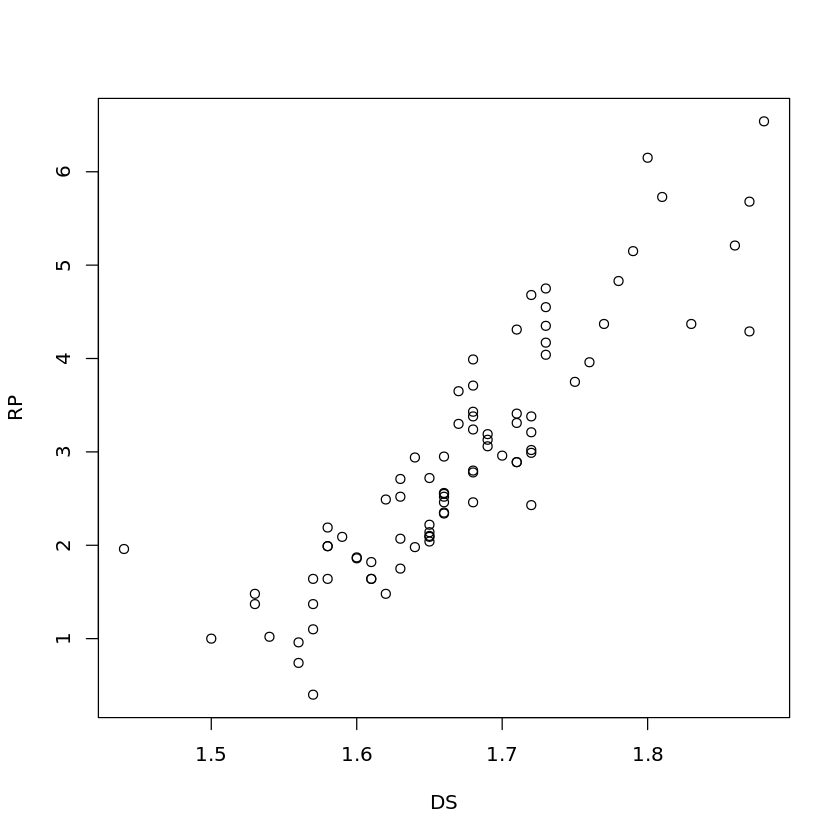

In [3]:
plot(RP ~ DS, data = solo)

In [4]:
# Ajuste do modelo
m1 <- lm(RP ~ DS, data = solo)
m1


Call:
lm(formula = RP ~ DS, data = solo)

Coefficients:
(Intercept)           DS  
     -19.62        13.49  


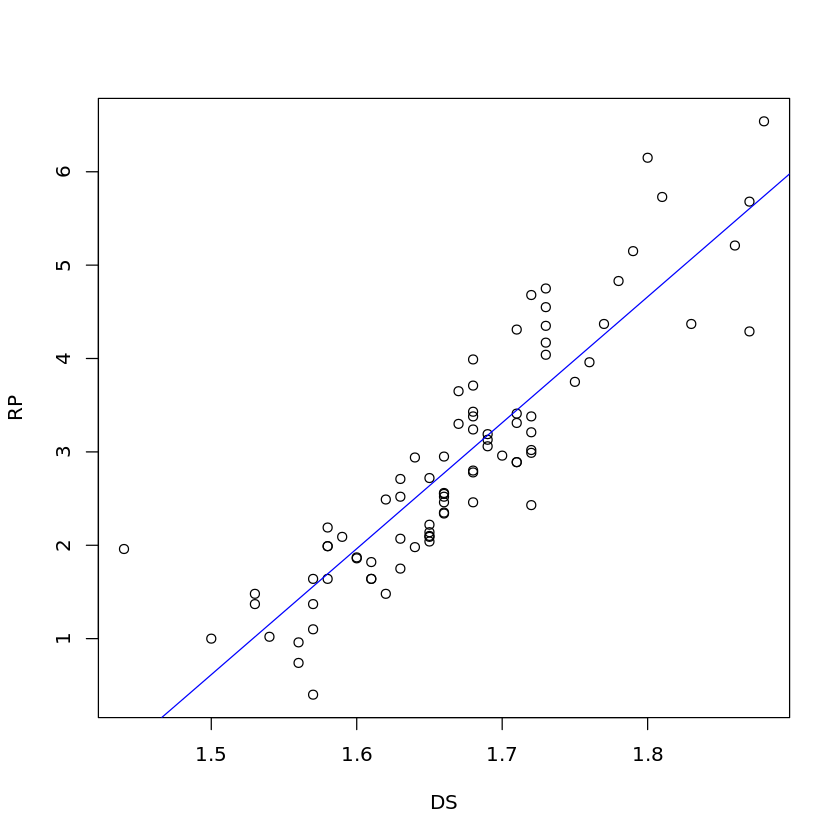

In [5]:
plot(RP ~ DS, data = solo)
abline(m1, col = "blue")

In [6]:
res <- residuals(m1)     # resíduos ordinários do modelo
res
sum(res)                 # soma = 0
sum(res^2)               # soma de quadrados dos resíduos

1           2           3           4           5           6 
 0.11355742 -0.05367787  0.62379272  0.43867507 -1.15879552 -0.68391317 
          7           8           9          10          11          12 
-0.45832493 -0.24250140 -0.49785434  0.94749860  0.49632213 -0.52297199 
         13          14          15          16          17          18 
-0.61808964  0.33749860 -0.26250140  0.86285154 -0.13714846  1.48891036 
         19          20          21          22          23          24 
 0.29632213  0.93402801  0.29632213  0.79985154 -0.41785434  0.74238095 
         25          26          27          28          29          30 
 0.39238095  0.19749860 -0.27832493  1.09796919 -0.18879552 -0.45879552 
         31          32          33          34          35          36 
 0.34191036  0.83308683  0.66749860 -0.09344258  1.03308683 -0.43273669 
         37          38          39          40          41          42 
 0.38749860  0.45308683 -0.03714846  0.43702801  0.63308683  0.32308683 
         43          44          45          46          47          48 
 0.46073389  0.26143978 -0.59785434  0.07473389 -0.35226611 -0.53785434 
         49          50          51          52          53          54 
 0.17726331 -0.54785434 -0.42273669 -0.69573669  0.38538095 -0.31273669 
         55          56          57          58          59          60 
-0.22273669 -0.37203081 -0.55714846 -0.23667787 -0.10344258  0.35073389 
         61          62          63          64          65          66 
-0.75320728 -0.45832493  0.08120448 -0.20203081 -0.46391317 -0.59203081 
         67          68          69          70          71          72 
-0.21273669 -0.25273669 -0.55714846 -0.16156022  0.15191036  0.01261625 
         73          74          75          76          77          78 
 0.25679272 -0.26038375 -0.56203081 -0.11738375 -1.15203081  2.15467507 
         79          80          81          82          83          84 
-0.29808964 -1.31526611 -0.13414846  0.08214566 -0.58250140 -0.04738375

[1] 1.078998e-15

[1] 29.05909

In [7]:
# somas de quadrados de resíduos com 
# ...b1 = 12
res.12 <- solo$RP - (-19.62 + 12 * solo$DS)
sum(res.12^2)

# ...b1 = 14
res.14 <- solo$RP - (-19.62 + 14 * solo$DS)
sum(res.14^2)

[1] 550.1898

[1] 90.2454

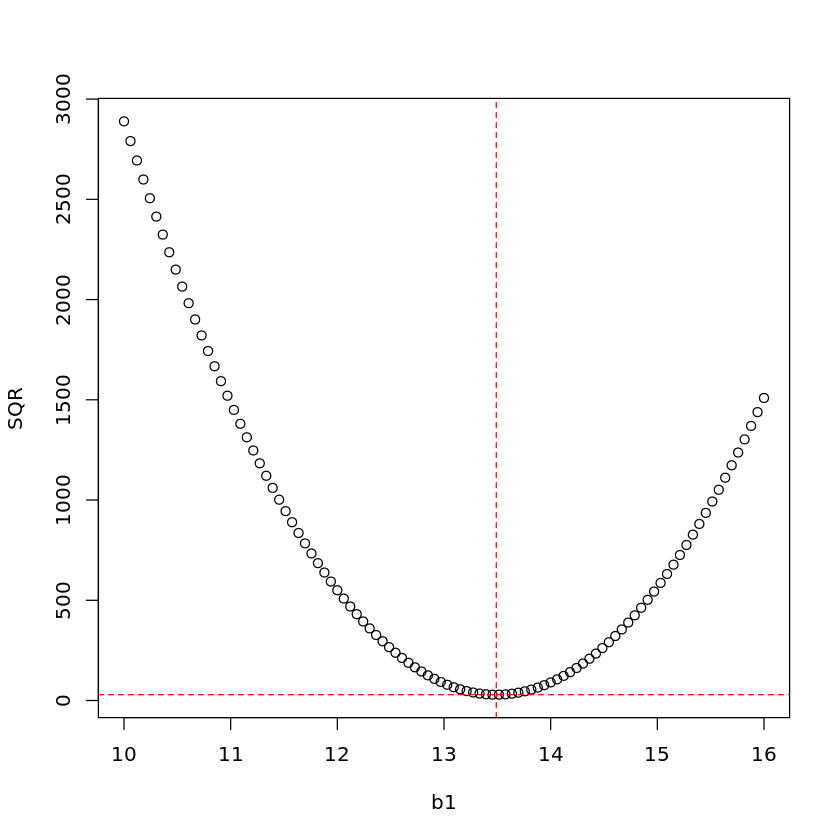

In [8]:
# gráfico da SQ resíduos em função de b1
b1 <- seq(10, 16, length.out = 100)                   # sequência de 100 valores supostos para b1
SQR <- c()
for(i in 1:100) {
   res. <- solo$RP - (-19.62 + b1[i] * solo$DS)
   SQR[i] <- sum(res.^2)
}
plot(SQR ~ b1)
abline(h = 29.06, v = 13.49, lty = 2, col = "red")

*Coeficiente de determinação*

In [ ]:
library(soilphysics)
Rsq(m1)

*Independência e normalidade residual*

In [ ]:
# Teste de Durbin-Watson
library(car)
dwt(m1)

In [13]:
# Teste de Shapiro-Wilk
resid <- residuals(m1)
shapiro.test(resid)


	Shapiro-Wilk normality test

data:  resid
W = 0.96404, p-value = 0.01908


*Análise de variância da regressão*

$H_0: b_1 = 0$

In [14]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
DS,1,108.24983,108.2498324,305.4633,2.202326e-29
Residuals,82,29.05909,0.3543792,NA,NA


*Teste t*

$H_0: b_j = 0$

In [15]:
summary(m1)


Call:
lm(formula = RP ~ DS, data = solo)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3153 -0.4391 -0.1104  0.3594  2.1547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.6177     1.2905  -15.20   <2e-16 ***
DS           13.4882     0.7717   17.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5953 on 82 degrees of freedom
Multiple R-squared:  0.7884,	Adjusted R-squared:  0.7858 
F-statistic: 305.5 on 1 and 82 DF,  p-value: < 2.2e-16


*Intervalo de confiança e de predição*

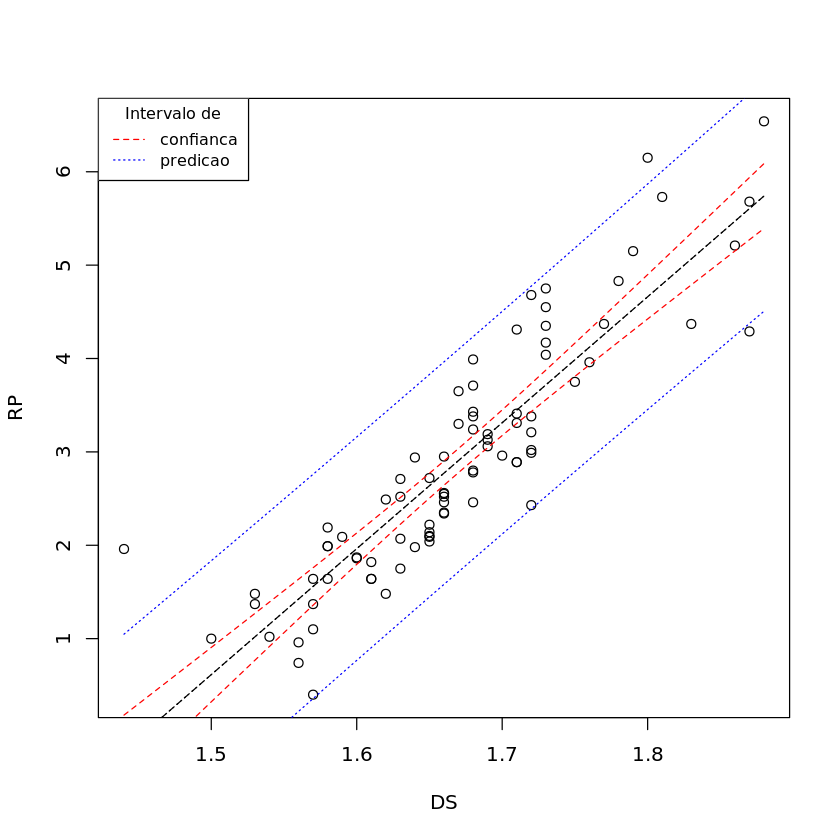

In [16]:
new <- data.frame(DS = seq(min(solo$DS), max(solo$DS), len = 99))  # sequência de valores de DS (eixo x) para predição
ic <- predict(m1, newdata = new, interval = "confidence")          # limites inferior e superior do IC 95%
ip <- predict(m1, newdata = new, interval = "prediction")          # limites inferior e superior do IP 95%
plot(RP ~ DS, data = solo)
matlines(new$DS, ic, col = c("black", "red", "red"), lty = 2)      # gráfico de múltiplas linhas
matlines(new$DS, ip, col = c("black", "blue", "blue"), lty = 3)
legend("topleft", c("confianca", "predicao"), 
       title = "Intervalo de", lty = 2:3, 
       col = c("red", "blue"), cex = 0.8)

____
**Regressão linear múltipla**

$y = b_0 + b_1x_1 + b_2x_2 + ... + b_jx_j + \epsilon$

In [17]:
m2 <- lm(RP ~ DS + US + CO + Argila, data = solo)
summary(m2)


Call:
lm(formula = RP ~ DS + US + CO + Argila, data = solo)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23224 -0.41100 -0.04888  0.32306  1.74196 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.42886    2.59128  -4.411 3.22e-05 ***
DS            9.56573    1.56371   6.117 3.43e-08 ***
US           -0.22656    0.05022  -4.512 2.21e-05 ***
CO            0.00607    0.01585   0.383    0.703    
Argila        0.02524    0.05057   0.499    0.619    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.532 on 79 degrees of freedom
Multiple R-squared:  0.8371,	Adjusted R-squared:  0.8289 
F-statistic: 101.5 on 4 and 79 DF,  p-value: < 2.2e-16


*Diagnóstico de colinearidade*

In [18]:
X <- model.matrix(m2)       # matriz do modelo
M <- t(X) %*% X
autoval <- eigen(M)$values  # autovalores
max(autoval)/min(autoval)   # NC

[1] 1472029

In [ ]:
library(car)
vif(m2)

*Stepwise*

In [19]:
step(m2)

Start:  AIC=-101.17
RP ~ DS + US + CO + Argila

         Df Sum of Sq    RSS      AIC
- CO      1    0.0415 22.403 -103.017
- Argila  1    0.0705 22.432 -102.908
<none>                22.361 -101.173
- US      1    5.7615 28.123  -83.916
- DS      1   10.5924 32.954  -70.600

Step:  AIC=-103.02
RP ~ DS + US + Argila

         Df Sum of Sq    RSS      AIC
- Argila  1    0.0387 22.441 -104.872
<none>                22.403 -103.017
- US      1    6.0633 28.466  -84.897
- DS      1   10.6293 33.032  -72.400

Step:  AIC=-104.87
RP ~ DS + US

       Df Sum of Sq    RSS      AIC
<none>              22.441 -104.872
- US    1    6.6177 29.059  -85.165
- DS    1   27.1590 49.600  -40.253



Call:
lm(formula = RP ~ DS + US, data = solo)

Coefficients:
(Intercept)           DS           US  
    -11.646        9.910       -0.214  


*Construindo superfícies de resposta*

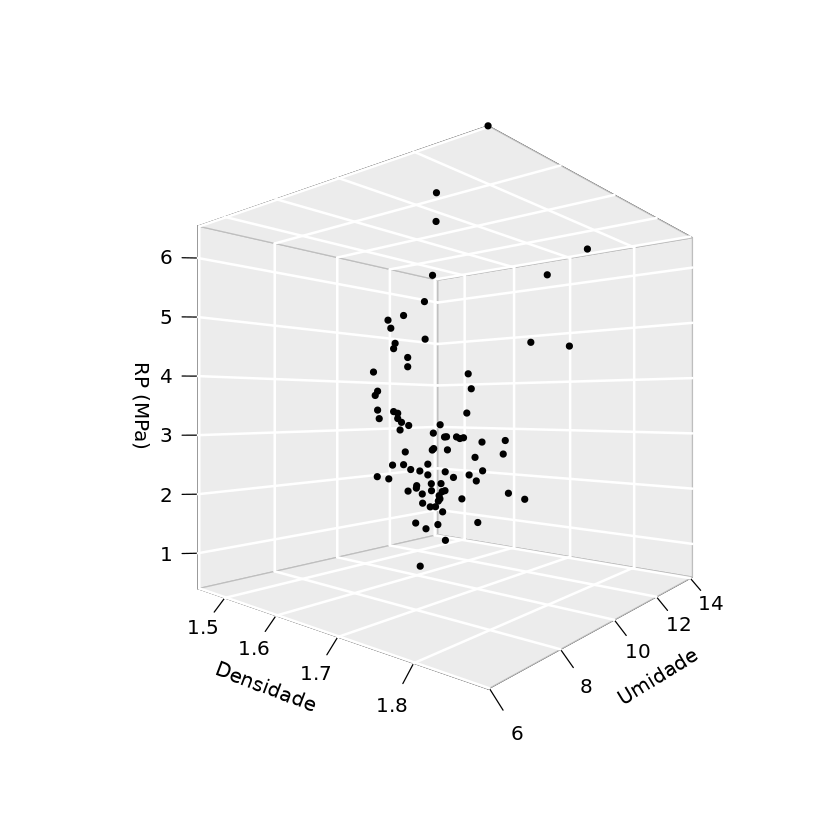

In [21]:
library(plot3D)
with(solo, points3D(x = DS, y = US, z = RP, 
   phi = 0, bty = "g", pch = 20, ticktype = "detailed",
   xlab="Densidade", ylab="Umidade", zlab="RP (MPa)", col=1))

In [22]:
m2 <- lm(RP ~ DS + US, data = solo)  # modelo selecionado via stepwise
m2


Call:
lm(formula = RP ~ DS + US, data = solo)

Coefficients:
(Intercept)           DS           US  
    -11.646        9.910       -0.214  


In [24]:
xy <- mesh(x=seq(min(solo$DS), max(solo$DS), length=50),                        # grid de predição
           y=seq(min(solo$US), max(solo$US), length=50))

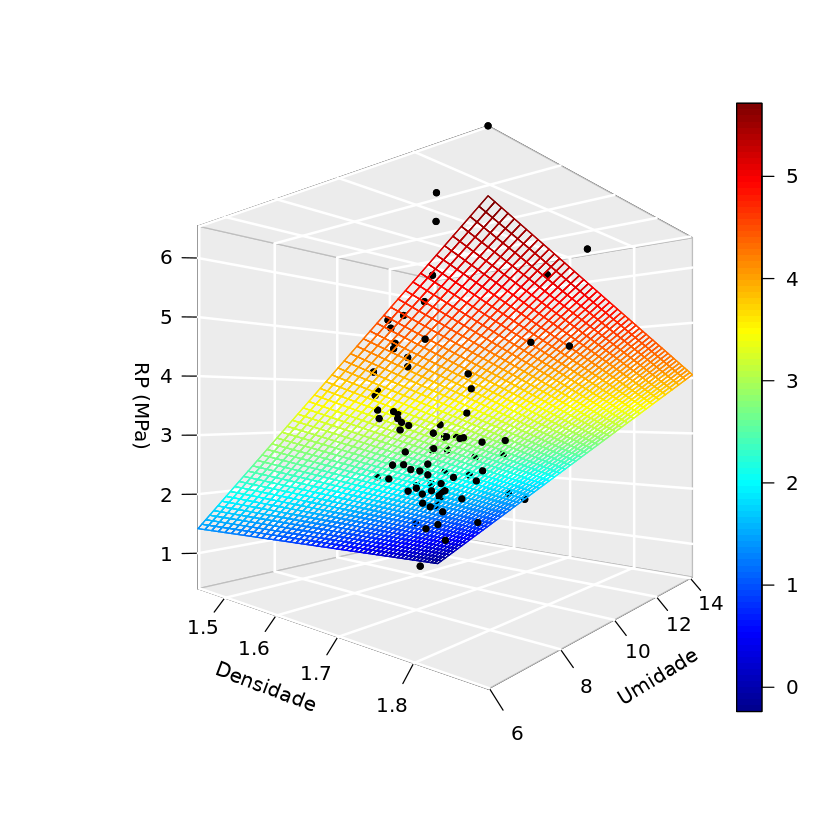

In [25]:
with(solo, points3D(x = DS, y = US, z = RP, 
   phi = 0, bty = "g", pch = 20, ticktype = "detailed",
   xlab="Densidade", ylab="Umidade", zlab="RP (MPa)", col=1))

# adicionando a superfície com as predições do modelo
with(xy, surf3D(x, y, z = -11.6 + 9.91*x  - 0.21*y, add = TRUE, facets = NA))

____
**Regressão não linear**

Exemplo: $y = b_0 + x^{b_1} + \epsilon$

In [27]:
D(expression(b0 + x^b1), "b1")    # teste de não linearidade

x^b1 * log(x)

Exemplo: $y = b_0 x^{-b_1} + \epsilon$

In [28]:
ps <- c(1, 2, 3, 4, 6, 8, 12)                       # tamanho da parcela
cv <- c(35.6, 29, 27.1, 25.6, 24.4, 23.3, 21.6)     # coef. de variação
lm(log(cv) ~ log(ps))                               # para obtenção dos valores iniciais


Call:
lm(formula = log(cv) ~ log(ps))

Coefficients:
(Intercept)      log(ps)  
     3.5309      -0.1908  


In [29]:
# estimativas de mínimos quadrados não lineares
nls(cv ~ b0*ps^-b1, start = list(b0 = exp(3.53), b1 = 0.19))

Nonlinear regression model
  model: cv ~ b0 * ps^-b1
   data: parent.frame()
     b0      b1 
34.5394  0.1996 
 residual sum-of-squares: 3.665

Number of iterations to convergence: 3 
Achieved convergence tolerance: 3.061e-06

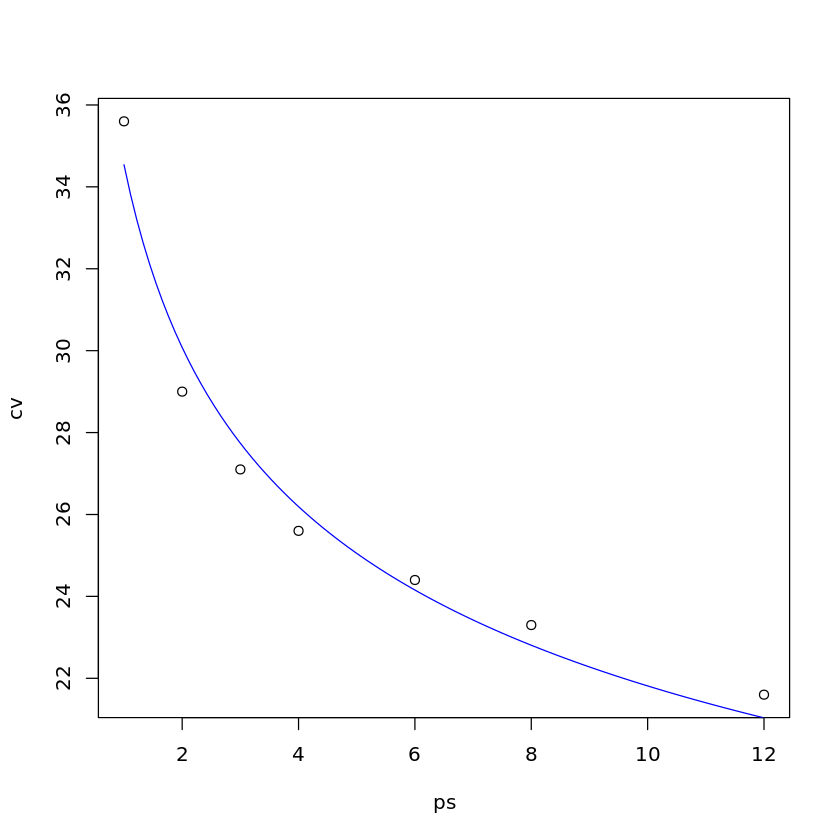

In [30]:
# gráfico com o ajuste do modelo
plot(ps, cv)
curve(34.54*x^-0.1996, add = TRUE, col = "blue")

____
**Linear Response Plateau**

$	h(x) = 
	\begin{array}{ll}
	b_0 + b_1x,    &  x \leq x_0 \\
	b_0 + b_1x_0,  &  x > x_0 
	\end{array} $

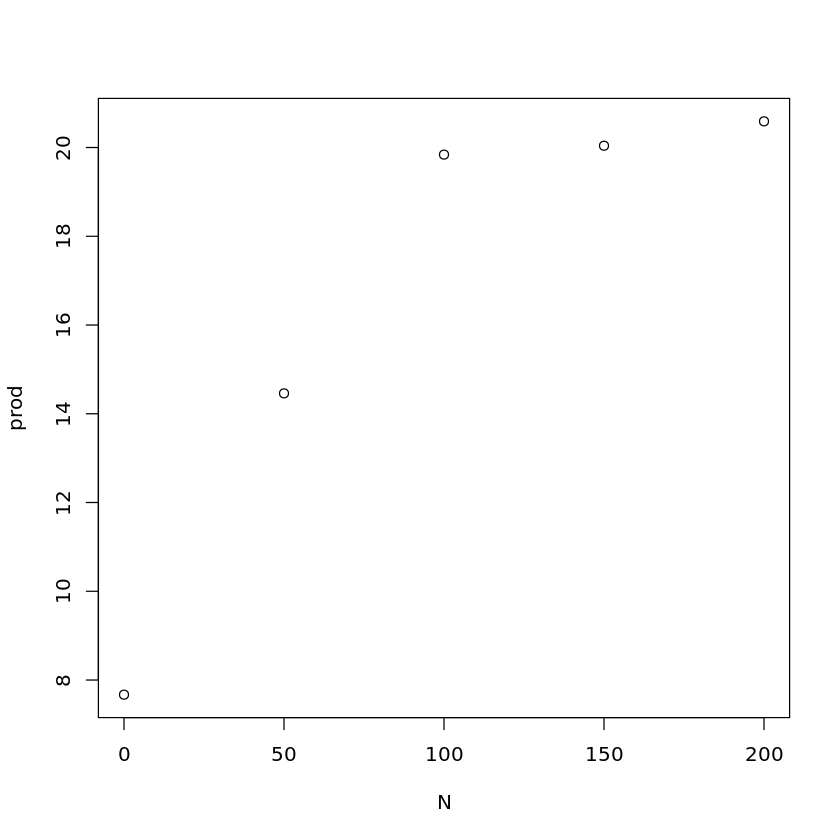

In [31]:
# exemplo
N <- c(0, 50, 100, 150, 200)
prod <- c(7.67, 14.46, 19.84, 20.04, 20.59)
plot(prod ~ N)

In [32]:
lrp <- function (x, b0, b1, x0) ifelse(x <= x0, b0 + b1*x, b0 + b1*x0)   # função que define o LRP
nls(prod ~ lrp(N, b0, b1, x0), start = list(b0 = 8, b1 = 0.1, x0 = 80))  # ajuste do modelo

Nonlinear regression model
  model: prod ~ lrp(N, b0, b1, x0)
   data: parent.frame()
     b0      b1      x0 
 7.6700  0.1358 91.9489 
 residual sum-of-squares: 0.3017

Number of iterations to convergence: 2 
Achieved convergence tolerance: 1.147e-08

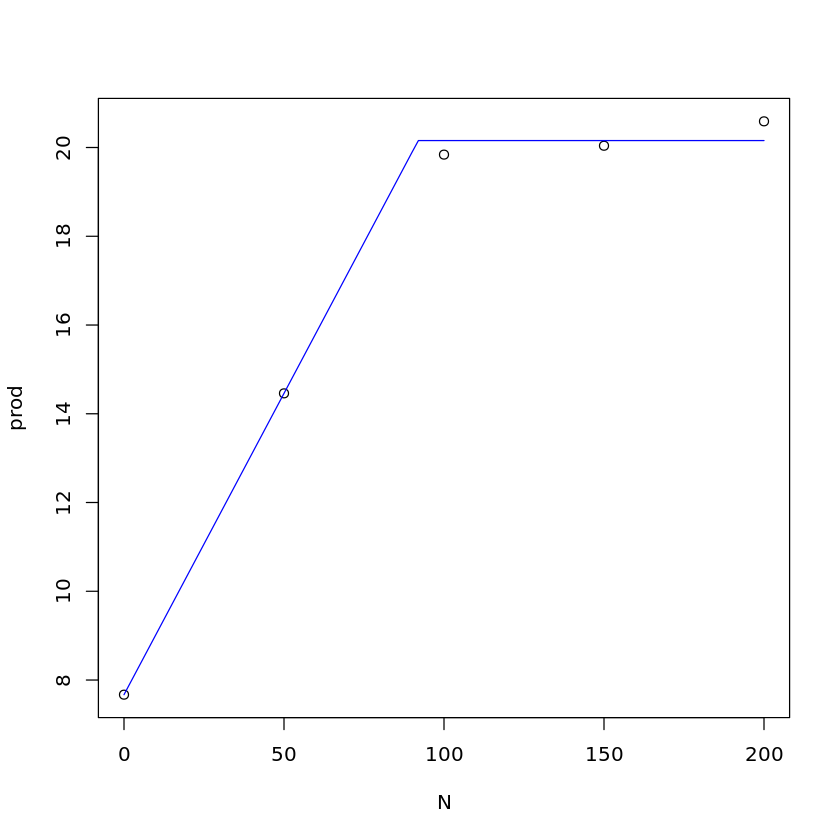

In [33]:
# gráfico com o ajuste
plot(prod ~ N)
curve(lrp(x, b0 = 7.67, b1 = 0.1358, x0 = 91.95), col = "blue", add = TRUE)

____
**Bootstrap na regressão**

In [34]:
mod <- nls(cv ~ b0*ps^-b1, start = list(b0 = exp(3.53), b1 = 0.19))
yhat <- fitted(mod)   # valores preditos
res <- residuals(mod) # residuos
res

[1]  1.0606354 -1.0772961 -0.6393862 -0.5916730  0.2442073  0.4919746  0.5648438
attr(,"label")
[1] "Residuals"

In [35]:
nboot <- 1000                                             # número de reamostragens
b <- matrix(nrow = nboot, ncol = 2)                       # matriz receptora das estimativas bootstrap de b0 e b1
colnames(b) <- c("b0", "b1")
# loop
for(i in 1:nboot) {
   res.boot <- sample(res, replace = TRUE)
   yboot <- yhat + res.boot
   b[i, ] <- coef(nls(yboot ~ b0*ps^-b1, 
             start = c(b0 = exp(3.53), b1 = 0.19)))
}

In [36]:
# percentis bootstrap 2.5% e 97.5%
apply(b, 2, quantile, p = c(0.025, 0.975))

,b0,b1
2.5%,33.40736,0.1744707
97.5%,35.57824,0.2234244


In [37]:
# intervalos paramétricos de 95% confianca
confint(mod)

Waiting for profiling to be done...



,2.5%,97.5%
b0,32.7203485,36.3799185
b1,0.1606861,0.2385172


In [ ]:
# Intervalos de confiança bootstrap para os valores esperados

# sequencia de 100 valores x (tam. parcela)
ps. <- seq(1, 12, length.out = 100)

# matriz nula para receber predicoes bootstrap
yhat.boot <- matrix(nrow = nboot, ncol = length(ps.))

# loop das predicoes
for(i in 1:nboot) yhat.boot[i, ] <- b[i,1] * ps.^-b[i,2]

# percentis em cada valor de ps.
IC.boot <- apply(yhat.boot, 2, quantile, p = c(0.025, 0.5, 0.975))

# grafico
matplot(x = ps., y = t(IC.boot), type = "l")
points(cv ~ ps)
legend("topright", c("2.5", "50", "97.5"), title = "Percentil", lty = 1:3, col = 1:3, cex = 0.9)